## Regresión Logística ##

La regresión logística es utilizada para predecir salidas categóricas. Los paquetes más utilizados, similar a lo que ocurre con regresión lineal, son `sklearn` y `statsmodels`. La regresión logística pertenece al grupo de modelos llamados GLM (Generalized Linear Models).

---

### Regresión Binaria (Binary Clasification)

Se importan los datos desde https://www.kaggle.com/uciml/pima-indians-diabetes-database para trabajar y realizar nuestros modelos. Este dataset nos indica si un paciente tiene diabetes en base a ciertas circunstancias clínicas.

Modelo utilizando la librería `sklearn`

In [35]:
import pandas as pd
# Nombres cortos
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# Cargamos dataset
data = pd.read_csv("diabetes.csv")
data.columns = col_names
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
from sklearn.model_selection import train_test_split
# Hacemos train y test
X_train,X_test,y_train,y_test=train_test_split(data.drop("label", axis=1), 
                                               data["label"], test_size=0.25, 
                                               random_state=0)

La documentación de `sklearn` esta disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html para consultar parámetros y ajustes del modelo.

In [37]:
from sklearn.linear_model import LogisticRegression

# Creamos modelo
logreg = LogisticRegression(max_iter=300)
# Entrenamos modelo
logreg.fit(X_train,y_train)
# Predecimos salida
y_pred=logreg.predict(X_test)


Debido a que en regresión logística no contamos con una medida de error como R2, es necesario utilizar otras métricas, tales como:
* Matriz de confusión 
* Precision 
* Recall
* Accuracy
* Curva ROC
* F1 Score

**Tarea: Investigar cmo se obtienen, su significado y aplicación de estas medidas de error.**

In [38]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 36  26]
 [ 12 118]]


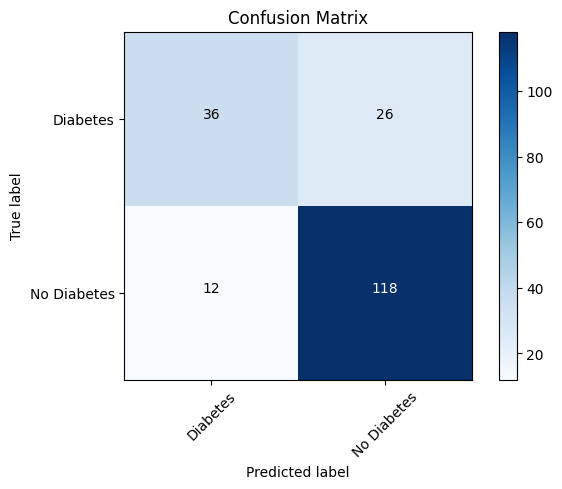

In [39]:

matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
cm_plot_labels = ["Diabetes", "No Diabetes"]
plot_confusion_matrix(cm=matrix, classes=cm_plot_labels, title='Confusion Matrix')


Modelo implementando la librería `statsmodels`. La documentación completa se puede encontrar en: https://www.statsmodels.org/stable/discretemod.html

In [40]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [41]:
import statsmodels.api as sm
# Creamos modelo
logit_model = sm.Logit(y_train, X_train)
# Entrenamos
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.622286
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: label            Pseudo R-squared: 0.046     
Date:               2024-04-17 19:07 AIC:              732.8739  
No. Observations:   576              BIC:              767.7228  
Df Model:           7                Log-Likelihood:   -358.44   
Df Residuals:       568              LL-Null:          -375.58   
Converged:          1.0000           LLR p-value:      1.5234e-05
No. Iterations:     5.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
pregnant       0.0958    0.0318   3.0164  0.0026   0.0336   0.1580
glucose        0.0115    0.0031   3.6587  0.0003   0.0053   0.

In [42]:
# Predecimos
y_results = result.predict(X_test)
prediction = list(map(round, y_results))


Confusion matrix, without normalization
[[ 25  37]
 [ 17 113]]


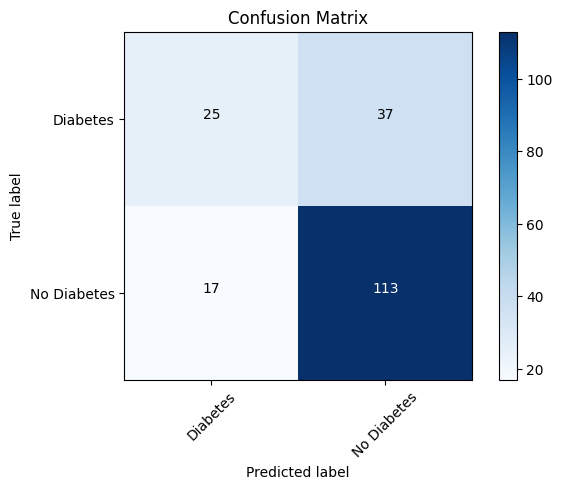

In [43]:
matrix = confusion_matrix(y_test, prediction, labels = [1,0])
cm_plot_labels = ["Diabetes", "No Diabetes"]
plot_confusion_matrix(cm=matrix, classes=cm_plot_labels, title='Confusion Matrix')

---
### Práctica en Clase

Utilizando la base datos que se encuentra en: https://archive.ics.uci.edu/ml/datasets/bank+marketing recopilada por un banco portugués donde preguntan a usuarios si aceptarían un servicio o no. Realizar un modelo de regresión logística y especificar cuales variables serían viables conservar explicando sus respuestas.

**Tarea 2: Realizar una regresión logística con 2 features y dibujar su línea de separación entre clases**

In [44]:
df = pd.read_csv("bank.csv", delimiter=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [45]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [46]:
X = df[['pdays', 'previous']]
y = df['y']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)


In [50]:
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [51]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0 138]
 [  1 992]]


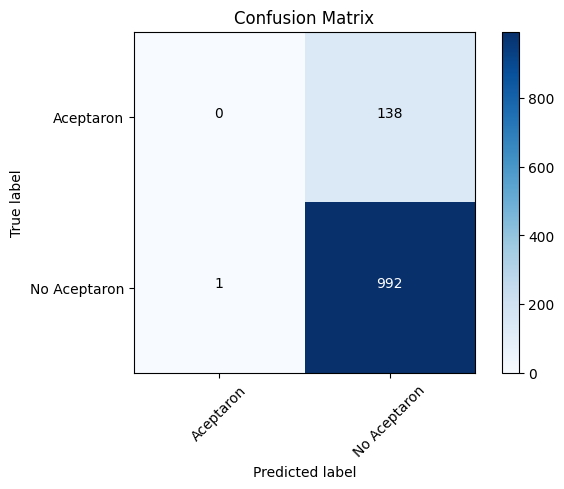

In [58]:
matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
cm_plot_labels = ["Aceptaron", "No Aceptaron"]
plot_confusion_matrix(cm=matrix, classes=cm_plot_labels, title='Confusion Matrix')

In [53]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.664406
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: -0.884   
Date:               2024-04-17 19:10 AIC:              4508.6712
No. Observations:   3390             BIC:              4520.9284
Df Model:           1                Log-Likelihood:   -2252.3  
Df Residuals:       3388             LL-Null:          -1195.7  
Converged:          1.0000           LLR p-value:      1.0000   
No. Iterations:     5.0000           Scale:            1.0000   
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
pdays        -0.0046    0.0006  -8.1209  0.0000  -0.0057  -0.0035
previous     -0.0540    0.0333  -1.6228  0.1046  -0.1193   0.0112



In [54]:
y_results = result.predict(X_test)
prediction = list(map(round, y_results))

Confusion matrix, without normalization
[[ 89  49]
 [843 150]]


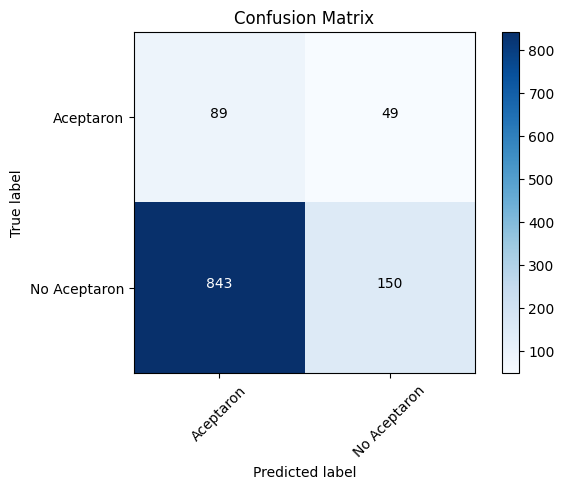

In [59]:
matrix = confusion_matrix(y_test, prediction, labels = [1,0])
cm_plot_labels = ["Aceptaron", "No Aceptaron"]
plot_confusion_matrix(cm=matrix, classes=cm_plot_labels, title='Confusion Matrix')

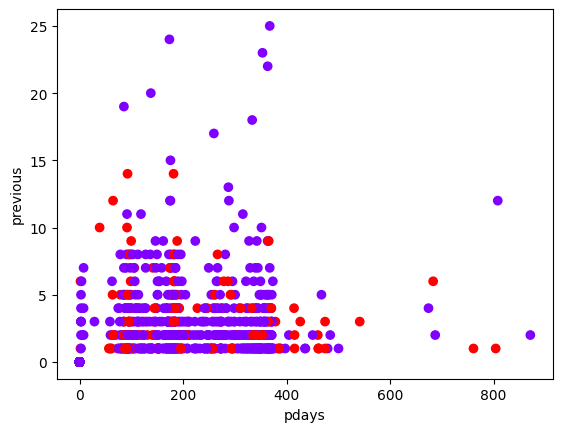

In [56]:
plt.scatter(df['pdays'], df['previous'], c=df['y'], cmap='rainbow')
plt.xlabel('pdays')
plt.ylabel('previous')
plt.show()


In [60]:
X, y = df[['pdays', 'previous']], df['y']
clf = LogisticRegression().fit(X, y)
print(clf.intercept_, clf.coef_)



[-2.19063396] [[0.00162584 0.09713748]]


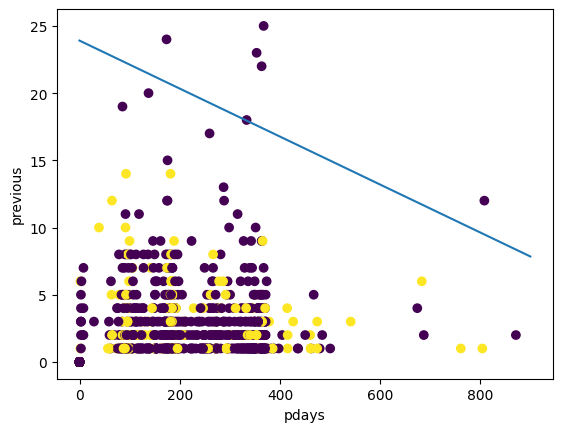

In [70]:
b0 = logreg.intercept_
b1 = logreg.coef_[0][0] 
b2 = logreg.coef_[0][1]
x = np.arange(-1, 900, 0.1)
y = -b0/b2 - b1/b2*x
plt.plot(x, y)
plt.scatter(df["pdays"], df["previous"], c=df["y"])
plt.xlabel("pdays")
plt.ylabel("previous")
plt.show()